<h1>Analisis de la calidad de los datos de google</h1>

<h3>Importamos librerias a usar.</h3>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

<h4>Disponemos la ruta donde estara el archivo</h4>

In [2]:
folder_path = r'C:\Users\EFRAIN LINARES\Desktop\Proyecto Final\Google\metadata.csv.xls'

<h4>Creamos el DataFrame con los datos</h4>

In [3]:
df = pd.read_csv(folder_path)

In [4]:
df

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,NaN,32.388300,-83.357100,['Pharmacy'],4.9,16,NaN,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,NaN,34.018891,-118.215290,['Textile exporter'],4.5,6,NaN,NaN,NaN,Open now,"['0x80c2c624136ea88b:0xb0315367ed448771', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,NaN,34.058092,-118.292130,['Korean restaurant'],4.4,18,NaN,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"['0x80c2c78249aba68f:0x35bf16ce61be751d', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,NaN,34.023669,-118.232930,['Fabric store'],3.3,6,NaN,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"['0x80c2c8811477253f:0x23a8a492df1918f7', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,NaN,34.036694,-118.249421,['Fabric store'],4.3,7,NaN,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"['0x80c2c62c496083d1:0xdefa11317fe870a1', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1925002,The Green Room Of Libertyville,"The Green Room Of Libertyville, 624 Milwaukee ...",0x880f96c84b0ef57b:0xe75b67b15a2cfdad,"Innovative, globally inspired dishes are paire...",42.289450,-87.954386,"['Restaurant', 'Bar']",4.6,228,$$,"[['Saturday', '4:30–9PM'], ['Sunday', 'Closed'...","{'Service options': ['Curbside pickup', 'No-co...",Closed ⋅ Opens 4:30PM,"['0x880f96c848329bd5:0x5a6609c274091c81', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1925003,Klein Brothers Packaging,"Klein Brothers Packaging, 1515 S Fresno Ave, S...",0x80901260b5987b39:0x8a5028c253e7bee6,NaN,37.934318,-121.313102,['Trucking company'],4.2,3,NaN,"[['Saturday', '10AM–1PM'], ['Sunday', 'Closed'...",NaN,Open ⋅ Closes 1PM,"['0x80900c2bd9b41a37:0x5de883f3a0746a61', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1925004,Profiles Hair Design,"Profiles Hair Design, 522 N Federal Blvd, Rive...",0x8758dd1e2533c991:0x5f6d112918f07dba,NaN,43.029664,-108.380849,"['Beauty salon', 'Hair salon']",4.7,76,NaN,"[['Saturday', '9AM–4PM'], ['Sunday', 'Closed']...",{'Accessibility': ['Wheelchair accessible entr...,Open ⋅ Closes 4PM,"['0x8758dd1ffba87d8f:0xf211a1ebf7297000', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
1925005,Arizona LINE-X,"Arizona LINE-X, 21242 N Black Canyon Hwy #A, P...",0x872b6f6f24aea445:0x22df9e5dd01e67ba,NaN,33.680066,-112.113367,"['Truck accessories store', 'Powder coating se...",4.6,24,NaN,"[['Saturday', 'Closed'], ['Sunday', 'Closed'],...","{'Service options': ['In-store shopping'], 'Pa...",Closed ⋅ Opens 8AM Mon,"['0x872b6f9d1b41ad95:0x94a335fc923f0987', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


<h4>Visualizamos el tipo de datos y cuantas columnas tiene el DataFrame.</h4>

In [7]:
# Visualizar columnas
df.columns

Index(['name', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
       'category', 'avg_rating', 'num_of_reviews', 'price', 'hours', 'MISC',
       'state', 'relative_results', 'url'],
      dtype='object')

In [8]:
df_business = df

In [9]:
# Verificar el tipo de datos del DataFrame
print(df_business.dtypes)

name                 object
address              object
gmap_id              object
description          object
latitude            float64
longitude           float64
category             object
avg_rating          float64
num_of_reviews        int64
price                object
hours                object
MISC                 object
state                object
relative_results     object
url                  object
dtype: object


<h4>Verificamos valores nulos y sacamos el porcentaje de los mismos</h4>

In [10]:
# Verificamos los valores nulos del dataFrame

valores_nulos = df_business.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos) #Valores nulos

Valores nulos por columna:
name                     38
address               48944
gmap_id                   0
description         1755238
latitude                  0
longitude                 0
category              10624
avg_rating                0
num_of_reviews            0
price               1741198
hours                491188
MISC                 427783
state                465999
relative_results     182620
url                       0
dtype: int64


In [11]:
# Verificamos el porcentaje de los valores nulos

porcentaje_nulos = (df_business.isnull().sum() / len(df_business)) * 100
print("Porcentaje de los valores nulos por columna:")

print(porcentaje_nulos)

Porcentaje de los valores nulos por columna:
name                 0.001974
address              2.542536
gmap_id              0.000000
description         91.180863
latitude             0.000000
longitude            0.000000
category             0.551894
avg_rating           0.000000
num_of_reviews       0.000000
price               90.451515
hours               25.516167
MISC                22.222413
state               24.207652
relative_results     9.486719
url                  0.000000
dtype: float64


<b>Podemos observar una gran cantidad de valores faltantes y nulos en las columnas “description” y “price”. Los datos faltantes superan el 90% en ambos casos, por lo que su infomación es, prima facie, irrelevante para identificar posibles insights.</b>

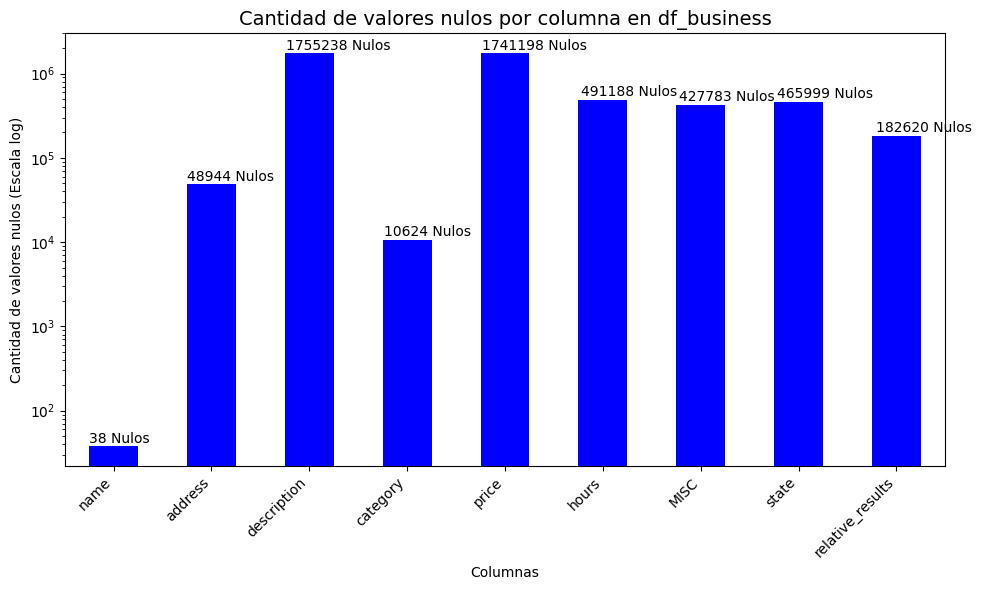

In [12]:
# Calcular la cantidad de valores nulos por columna en df_business_google
cantidad_nulos_google = df_business.isnull().sum()

# Filtrar solo las columnas que tienen nulos
cantidad_nulos_google = cantidad_nulos_google[cantidad_nulos_google > 0]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = cantidad_nulos_google.plot(kind='bar', color='blue')

# Personalizar el gráfico
plt.title('Cantidad de valores nulos por columna en df_business', fontsize=14)
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos (Escala log)')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas con los valores encima de cada barra
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())} Nulos', (p.get_x() * 1.005, p.get_height() * 1.1))

# Ajustar la escala si las diferencias son grandes
ax.set_yscale('log')  # Escala logarítmica para mejorar la visualización

plt.tight_layout()

# Mostrar el gráfico
plt.show()

<b>Este grafico muestra la cantidad de nulos representada en escala logaritmica y encima de cada barra podemos visualizar la cantidad real de los mismos.</b>



<h4>Buscamos columnas duplicadas</h4>

In [13]:
# Verificar si hay columnas duplicadas en el DataFrame
duplicated_columns = df_business.columns[df_business.columns.duplicated()]
print(f"Columnas duplicadas: {duplicated_columns}")

Columnas duplicadas: Index([], dtype='object')


<h4>Buscamos Filas duplicadas</h4>

In [14]:
# Convertir todas las columnas de tipo 'object' (incluyendo listas y diccionarios) a cadenas de texto
for col in df_business.columns:
    if df_business[col].dtype == 'object':
        df_business[col] = df_business[col].apply(lambda x: str(x) if isinstance(x, (list, dict)) else x)

# Encontrar las filas duplicadas
filas_duplicadas = df_business[df_business.duplicated(keep=False)]  

# Numero de filas duplicadas
print(f"Número total de filas duplicadas: {df_business.duplicated().sum()}")

Número total de filas duplicadas: 26579


<h4>Graficamos las filas duplicadas en comparación al total de los datos duplicados</h4>

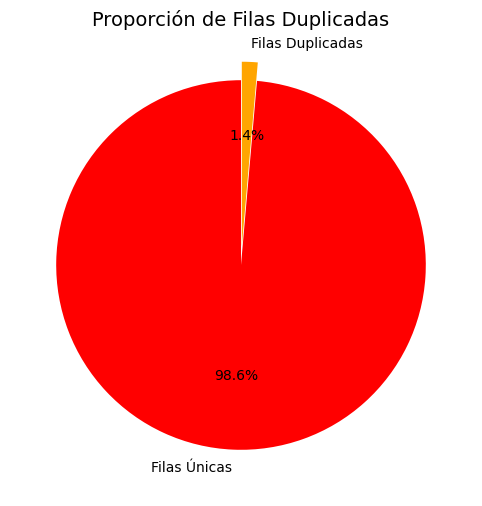

In [18]:
# Calcular la cantidad de filas duplicadas
total_filas = len(df_business)
filas_duplicadas = df_business.duplicated().sum()
filas_unicas = total_filas - filas_duplicadas

# Crear los datos para el gráfico
datos_duplicados = [filas_unicas, filas_duplicadas]
etiquetas = ['Filas Únicas', 'Filas Duplicadas']
colores = ['red', 'orange']

# Crear el gráfico circular
plt.figure(figsize=(8, 6))
plt.pie(datos_duplicados, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90, explode=(0, 0.1))

# Personalizar el gráfico
plt.title('Proporción de Filas Duplicadas', fontsize=14)

# Mostrar el gráfico
plt.show()

<h4>Verificamos las filas duplicadas</h4>

In [19]:
# Buscar todas las filas en las que la columna 'name' sea "Porter Pharmacy"
resultado_busqueda = df_business[df_business['name'] == "Porter Pharmacy"]

# Mostrar los resultados
resultado_busqueda.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,NaN,32.3883,-83.3571,['Pharmacy'],4.9,16,NaN,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
26573,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,NaN,32.3883,-83.3571,['Pharmacy'],4.9,16,NaN,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
275001,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,NaN,32.3883,-83.3571,['Pharmacy'],4.9,16,NaN,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
550002,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,NaN,32.3883,-83.3571,['Pharmacy'],4.9,16,NaN,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
825003,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,NaN,32.3883,-83.3571,['Pharmacy'],4.9,16,NaN,"[['Friday', '8AM–6PM'], ['Saturday', '8AM–12PM...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"['0x88f16e41929435cf:0x5b2532a2885e9ef6', '0x8...",https://www.google.com/maps/place//data=!4m2!3...


In [ ]:
# Buscar todas las filas en las que la columna 'name' sea "Nova Fabrics"
resultado_busqueda = df_business[df_business['name'] == "Nova Fabrics"]

# Mostrar los resultados
resultado_busqueda.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,NaN,34.023669,-118.23293,['Fabric store'],3.3,6,NaN,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"['0x80c2c8811477253f:0x23a8a492df1918f7', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
26576,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,NaN,34.023669,-118.23293,['Fabric store'],3.3,6,NaN,"[['Thursday', '9AM–5PM'], ['Friday', '9AM–5PM'...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"['0x80c2c8811477253f:0x23a8a492df1918f7', '0x8...",https://www.google.com/maps/place//data=!4m2!3...
